***1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:***

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

***Ответ :*** а,в,г

***2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.***

***2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(16,8)})

In [5]:
# Пойдем по актуальной теме
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [14]:
COVID_.groupby('Country/Region',as_index=False).aggregate({'SNo':'count'})\
.rename(columns={'SNo':'Count'}).sort_values('Count',ascending=False).head(20)
# Выберем для анализа Японию

,Country/Region,Count
207,US,4468
123,Mainland China,3408
36,Canada,964
11,Australia,716
70,France,653
206,UK,607
142,Netherlands,275
53,Denmark,188
92,Hong Kong,110
104,Japan,110


In [16]:
COV_Jap=COVID_[COVID_['Country/Region']=='Japan']

In [22]:
COV_Jap['date']=pd.to_datetime(COV_Jap['ObservationDate'])

D:\anacondaz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
COV_Jap.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     110
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
date                 0
dtype: int64

In [18]:
COV_Jap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 35 to 23242
Data columns (total 8 columns):
SNo                110 non-null int64
ObservationDate    110 non-null object
Province/State     0 non-null object
Country/Region     110 non-null object
Last Update        110 non-null object
Confirmed          110 non-null float64
Deaths             110 non-null float64
Recovered          110 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.7+ KB


In [44]:
COV_Jap.describe()

,SNo,Confirmed,Deaths,Recovered
count,110.000000,110.000000,110.000000,110.000000
mean,8348.663636,3949.045455,112.454545,780.672727
std,7325.588124,5452.954719,174.732804,1431.749966
min,36.000000,1.000000,0.000000,0.000000
25%,1763.250000,76.500000,1.000000,14.250000
50%,6050.000000,858.500000,28.000000,144.000000
75%,14493.000000,7214.500000,119.250000,778.500000
max,23243.000000,15777.000000,624.000000,8127.000000


In [24]:
COV_Jap

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,2020-01-22
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0,2020-01-23
119,120,01/24/2020,NaN,Japan,1/24/20 17:00,2.0,0.0,0.0,2020-01-24
160,161,01/25/2020,NaN,Japan,1/25/20 17:00,2.0,0.0,0.0,2020-01-25
206,207,01/26/2020,NaN,Japan,1/26/20 16:00,4.0,0.0,1.0,2020-01-26
...,...,...,...,...,...,...,...,...,...
21950,21951,05/06/2020,NaN,Japan,2020-05-07 02:32:28,15253.0,556.0,4496.0,2020-05-06
22273,22274,05/07/2020,NaN,Japan,2020-05-08 02:32:32,15477.0,577.0,4918.0,2020-05-07
22596,22597,05/08/2020,NaN,Japan,2020-05-09 02:32:35,15575.0,590.0,5146.0,2020-05-08
22919,22920,05/09/2020,NaN,Japan,2020-05-10 02:32:30,15663.0,607.0,5906.0,2020-05-09


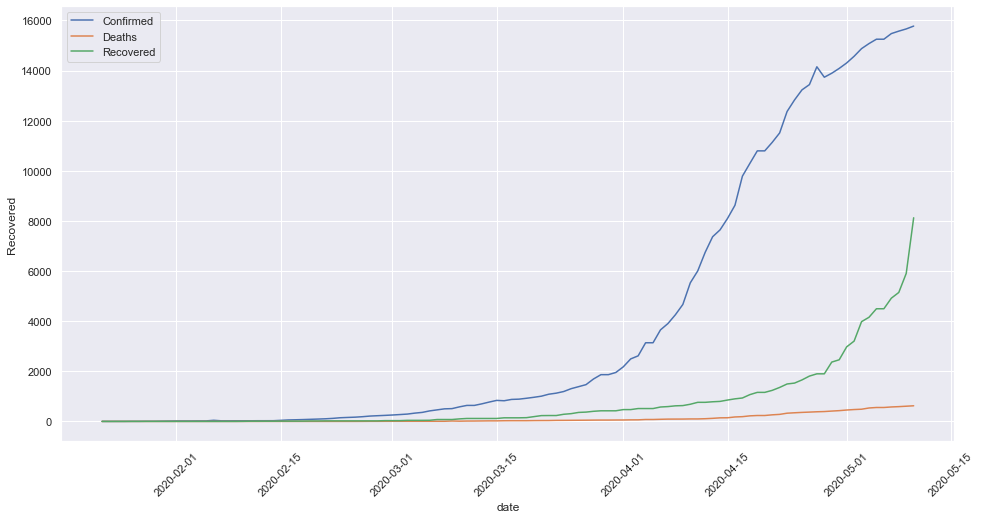

In [43]:
for x in ['Confirmed','Deaths','Recovered']:
    sns.lineplot(x='date',y=x,data=COV_Jap,label=x,legend='brief')
    plt.xticks( rotation=45)

Можно обратить внимание на то, что в конце апреля 2020 года было странное изменение ***подтвержденных кейсов***.

In [46]:
COV_Jap.tail(15)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date
18729,18730,04/26/2020,NaN,Japan,2020-04-27 02:31:20,13441.0,372.0,1809.0,2020-04-26
19048,19049,04/27/2020,NaN,Japan,2020-04-28 02:31:20,14153.0,385.0,1899.0,2020-04-27
19369,19370,04/28/2020,NaN,Japan,2020-04-29 02:32:29,13736.0,394.0,1899.0,2020-04-28
19690,19691,04/29/2020,NaN,Japan,2020-04-30 02:32:27,13895.0,413.0,2368.0,2020-04-29
20012,20013,04/30/2020,NaN,Japan,2020-05-01 02:32:28,14088.0,430.0,2460.0,2020-04-30
20335,20336,05/01/2020,NaN,Japan,2020-05-02 02:32:27,14305.0,455.0,2975.0,2020-05-01
20658,20659,05/02/2020,NaN,Japan,2020-05-03 02:32:28,14571.0,474.0,3205.0,2020-05-02
20981,20982,05/03/2020,NaN,Japan,2020-05-04 02:32:28,14877.0,487.0,3981.0,2020-05-03
21304,21305,05/04/2020,NaN,Japan,2020-05-05 02:32:34,15078.0,536.0,4156.0,2020-05-04
21627,21628,05/05/2020,NaN,Japan,2020-05-06 02:32:31,15253.0,556.0,4496.0,2020-05-05


***3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )***

***3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )***

In [56]:

COV_Jap=COV_Jap.set_index('date').copy()

In [63]:
COV_Jap.drop('SNo',axis=1,inplace=True)

In [70]:
# mean
COV_Jap_3D=COV_Jap.resample("3D").mean()
COV_Jap_W=COV_Jap.resample("W").mean()
COV_Jap_2W=COV_Jap.resample("2W").mean()
# std
COV_Jap_3D_s=COV_Jap.resample("3D").std()
COV_Jap_W_s=COV_Jap.resample("W").std()
COV_Jap_2W_S=COV_Jap.resample("2W").std()


In [71]:
COV_Jap_3D_s.head()

,Confirmed,Deaths,Recovered
date,,,
2020-01-22,0.577350,0.0,0.00000
2020-01-25,1.154701,0.0,0.57735
2020-01-28,2.309401,0.0,0.00000
2020-01-31,2.886751,0.0,0.00000
2020-02-03,1.154701,0.0,0.00000


In [72]:
# mean
# diff по 3 дневным иннтвервалом
COV_Jap_3D['Confirmed_diff']=COV_Jap_3D['Confirmed'].diff(1)
COV_Jap_3D['Deaths_diff']=COV_Jap_3D['Deaths'].diff(1)
COV_Jap_3D['Recovered_diff']=COV_Jap_3D['Recovered'].diff(1)
# diff по недельным иннтвервалом
COV_Jap_W['Confirmed_diff']=COV_Jap_W['Confirmed'].diff(1)
COV_Jap_W['Deaths_diff']=COV_Jap_W['Deaths'].diff(1)
COV_Jap_W['Recovered_diff']=COV_Jap_W['Recovered'].diff(1)
# diff по 2 недельным иннтвервалом
COV_Jap_2W['Confirmed_diff']=COV_Jap_2W['Confirmed'].diff(1)
COV_Jap_2W['Deaths_diff']=COV_Jap_2W['Deaths'].diff(1)
COV_Jap_2W['Recovered_diff']=COV_Jap_2W['Recovered'].diff(1)

# std
# diff по 3 дневным иннтвервалом
COV_Jap_3D_s['Confirmed_diff']=COV_Jap_3D_s['Confirmed'].diff(1)
COV_Jap_3D_s['Deaths_diff']=COV_Jap_3D_s['Deaths'].diff(1)
COV_Jap_3D_s['Recovered_diff']=COV_Jap_3D_s['Recovered'].diff(1)
# diff по недельным иннтвервалом
COV_Jap_W_s['Confirmed_diff']=COV_Jap_W_s['Confirmed'].diff(1)
COV_Jap_W_s['Deaths_diff']=COV_Jap_W_s['Deaths'].diff(1)
COV_Jap_W_s['Recovered_diff']=COV_Jap_W_s['Recovered'].diff(1)
# diff по 2 недельным иннтвервалом
COV_Jap_2W_S['Confirmed_diff']=COV_Jap_2W_S['Confirmed'].diff(1)
COV_Jap_2W_S['Deaths_diff']=COV_Jap_2W_S['Deaths'].diff(1)
COV_Jap_2W_S['Recovered_diff']=COV_Jap_2W_S['Recovered'].diff(1)


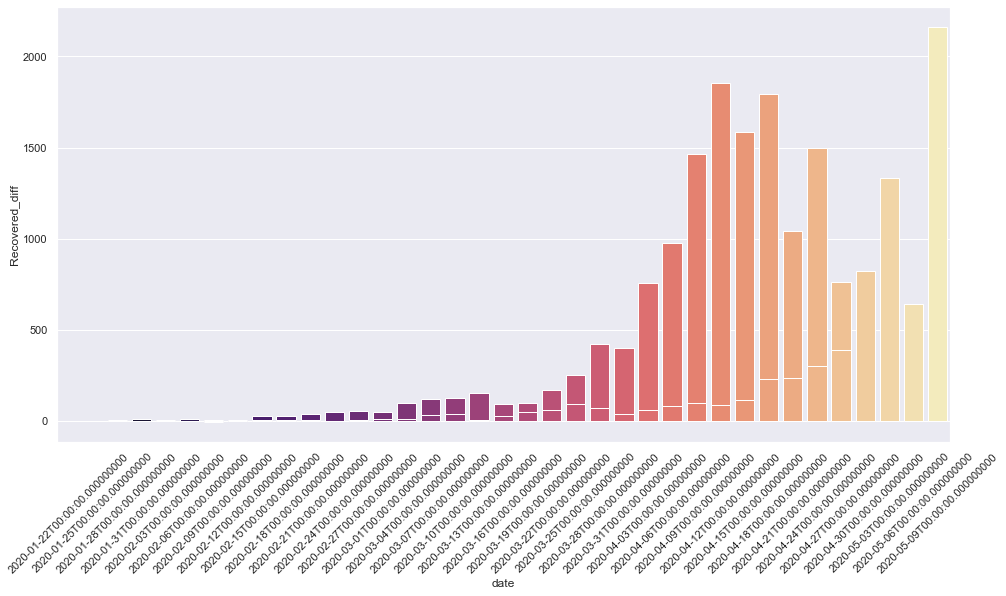

In [84]:
for x in ['Confirmed_diff','Deaths_diff','Recovered_diff']:
    sns.barplot(x=COV_Jap_3D.index,y=x,data=COV_Jap_3D,palette="magma")
    plt.xticks(rotation=45)
# plt.title='Confirmed_diff'

***4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовыми и исходными дневными.***